In [36]:
import pandas as pd #Import require libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Set general plot style
sns.set(style="whitegrid")

#Exploratory Data Analysis (EDA):

In [37]:
titanic_train = pd.read_csv('Titanic_train.csv') # load the dataset
titanic_train.head() # show the first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
titanic_test = pd.read_csv('Titanic_train.csv') # load the dataset
titanic_test.head() # show the first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
print(titanic_train.shape) # show the shape of the train dataset
print(titanic_test.shape) # show the shape of the train dataset

(891, 12)
(891, 12)


In [39]:
# As the shape and columns are same in both train and test data, we are combining it to do data exploration and data preprocessing, later we can split train and test data
titanic= pd.concat([titanic_train, titanic_test], ignore_index=True, sort=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
titanic.info() #Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1782 non-null   int64  
 1   Survived     1782 non-null   int64  
 2   Pclass       1782 non-null   int64  
 3   Name         1782 non-null   object 
 4   Sex          1782 non-null   object 
 5   Age          1428 non-null   float64
 6   SibSp        1782 non-null   int64  
 7   Parch        1782 non-null   int64  
 8   Ticket       1782 non-null   object 
 9   Fare         1782 non-null   float64
 10  Cabin        408 non-null    object 
 11  Embarked     1778 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 167.2+ KB


In [41]:
titanic.isnull().sum() #Checking for missing value count

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,354
SibSp,0
Parch,0
Ticket,0
Fare,0


In [42]:
titanic.drop('Cabin',axis=1,inplace=True) #Droping the Cabin column
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True) #Filling the missing values with mean
titanic[titanic['Embarked'].isnull()] #Find what are the null columns
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()) # Find the mode of the Embarked column
titanic.isna().sum() #Checking if the null values are there

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [44]:
titanic = titanic.drop(columns=['PassengerId','Name','Ticket']) #droping unwanted columns in the dataset

In [45]:
titanic.describe() # statistical information about the data

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486456,0.835836,12.998365,1.102434,0.805831,49.679476
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.903100
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
titanic.nunique() #Find the unique values in the dataset

,0
Survived,2
Pclass,3
Sex,2
Age,89
SibSp,7
Parch,7
Fare,248
Embarked,3


In [47]:
# Numerical features for exploration
numerical_features = ["Age", "Fare", "SibSp", "Parch"]

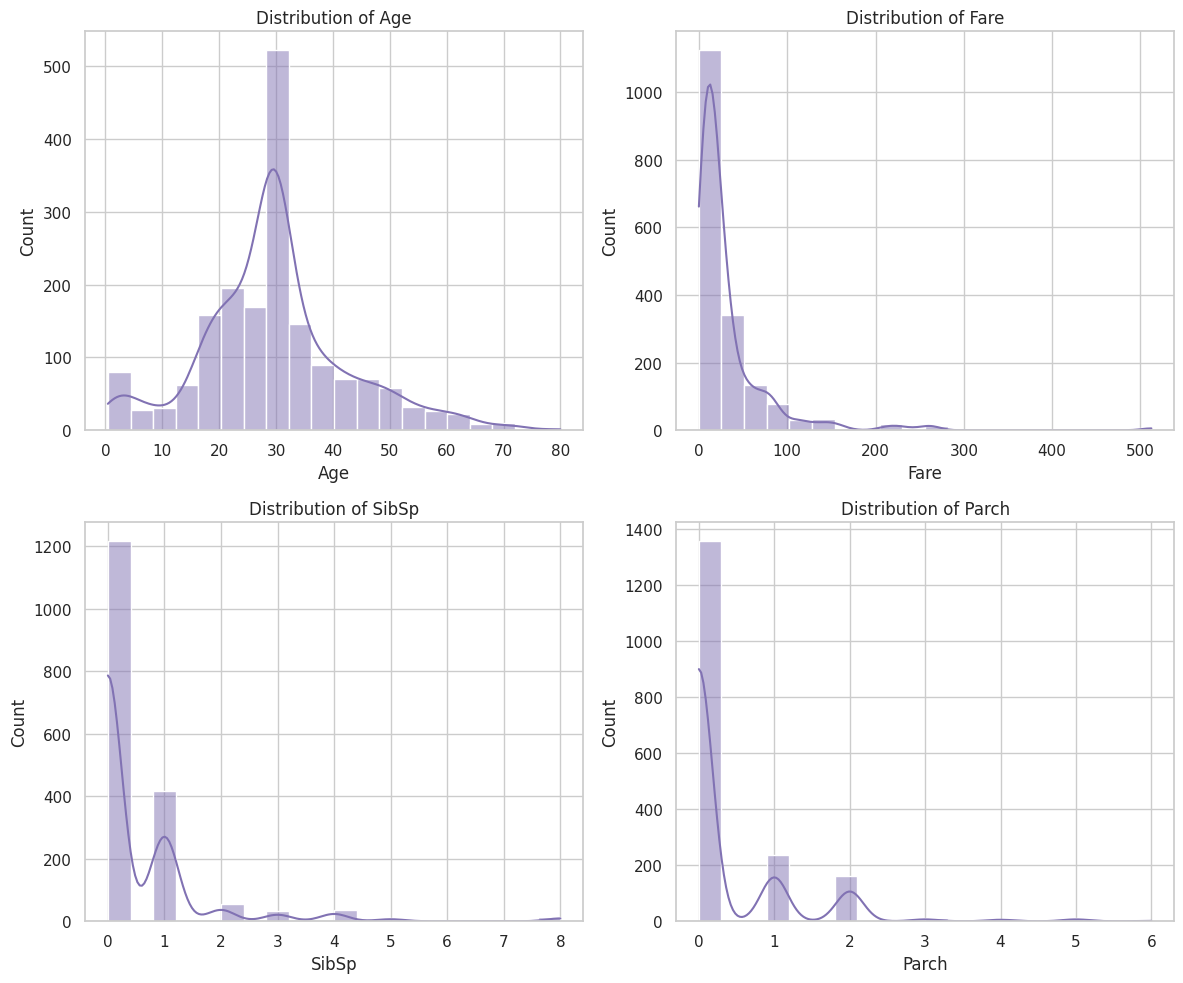

In [48]:
# Histograms- Shows the distribution of numerical features (Age, Fare, SibSp, Parch).
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, feature in enumerate(numerical_features):
    sns.histplot(titanic[feature], kde=True, ax=axes[i // 2, i % 2], bins=20, color='m')
    axes[i // 2, i % 2].set_title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

Analysis:

Age has a slightly right-skewed distribution with some missing values.

Fare is heavily right-skewed due to high outliers.

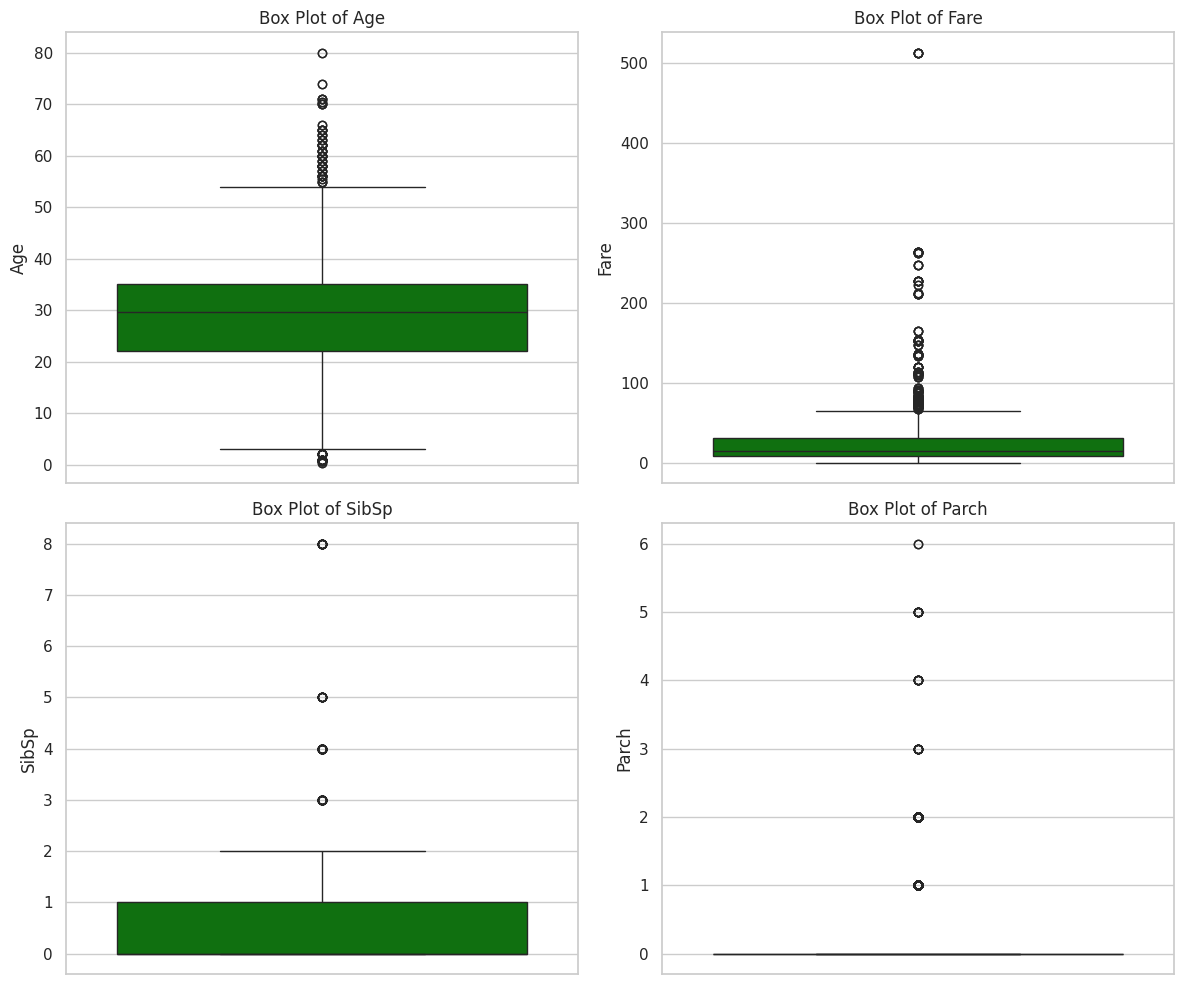

In [49]:
# Box plots for given data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=titanic, y=feature, ax=axes[i // 2, i % 2], color='green')
    axes[i // 2, i % 2].set_title(f"Box Plot of {feature}")
plt.tight_layout()
plt.show()

Analysis:

Highlight the spread and presence of outliers in numerical features.

Fare has significant outliers, while Age is relatively consistent.

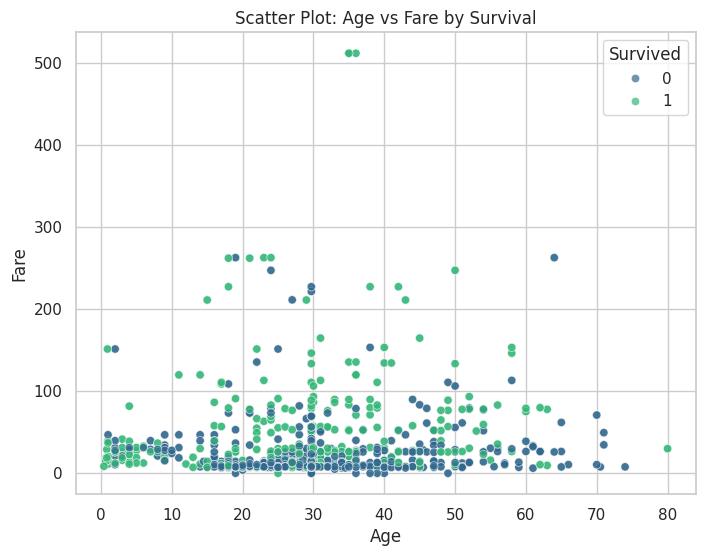

In [50]:
# Scatter plot: Age vs Fare by survival
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Survived", palette="viridis", alpha=0.7)
plt.title("Scatter Plot: Age vs Fare by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


Analysis:

Compares Age and Fare, with survival status as a hue.

Survivors tend to cluster in specific Fare ranges and Age groups.

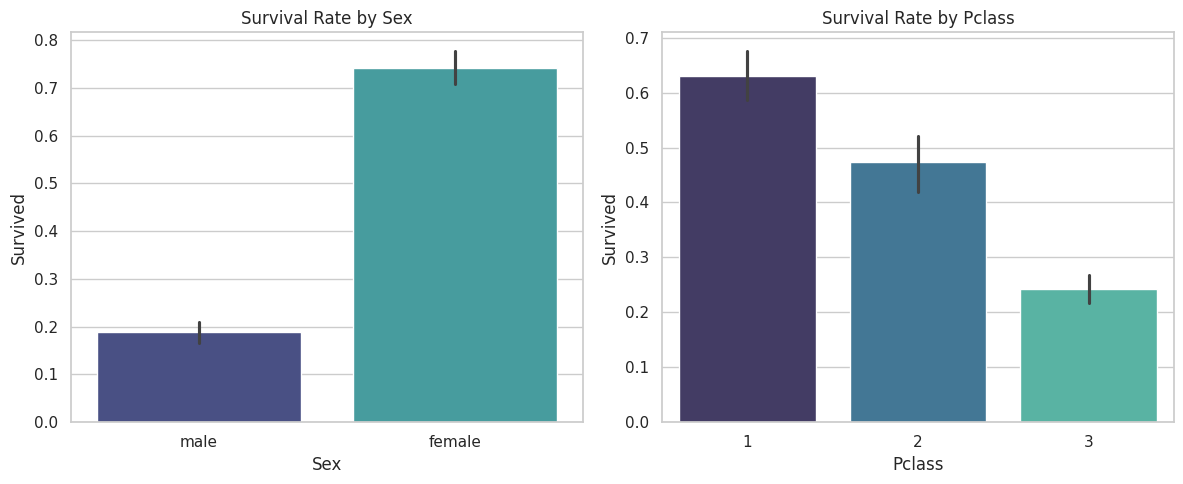

In [51]:
# Bar plots for categorical features on  data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data=titanic, x="Sex", y="Survived", ax=axes[0], palette="mako")
axes[0].set_title("Survival Rate by Sex")
sns.barplot(data=titanic, x="Pclass", y="Survived", ax=axes[1], palette="mako")
axes[1].set_title("Survival Rate by Pclass")
plt.tight_layout()
plt.show()


Analysis:

Survival is significantly higher for females than males.

Passengers in higher classes (Pclass 1) had better survival rates.

# Data Preprocessing:

In [52]:
from sklearn.preprocessing import LabelEncoder # Performing encoding technique using label encoder
label_encoder = LabelEncoder()

# fitting label_encoder to sex and embarked
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


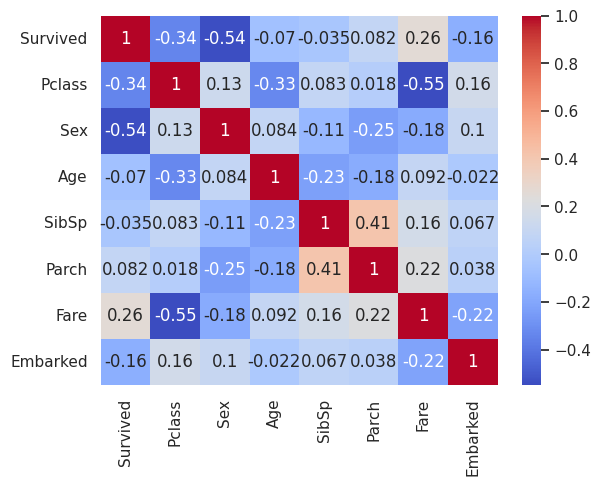

In [53]:
sns.heatmap(titanic.corr(),annot=True, cmap='coolwarm') # Ploting correlation plot
plt.show()

In [54]:
# # One-hot encode Embarked
# embarked_encoded = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
# titanic_data = pd.concat([titanic, embarked_encoded], axis=1)
# titanic_data.drop('Embarked', axis=1, inplace=True)

In [55]:
# Import libraries for model building
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import lightgbm as lgb
import xgboost as xgb

# Building Predictive Models:


Splitting the dataset: The dataset is divided into training and testing sets using an 80/20 split.

Evaluation metrics: Defined a function to calculate accuracy, precision, recall, F1-score, and a classification report.

Predictive models: Built and evaluated models using LightGBM and XGBoost.

Cross-validation and hyperparameter tuning: Used grid search to optimize hyperparameters for both models.



In [56]:
# titanic=titanic[:len(titanic_train)]
titanic.shape

(1782, 8)

In [57]:
# Splitting dataset into features and target
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [58]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
# Define evaluation metrics
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))


Build predictive models using LightGBM and XGBoost

In [60]:
# Build predictive models using LightGBM and XGBoost
# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42) # Accessing the LightGBM model
lgb_model.fit(X_train, y_train) # Accessing the LightGBM model
lgb_preds = lgb_model.predict(X_test) # predicting the test values


[LightGBM] [Info] Number of positive: 547, number of negative: 878
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 1425, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383860 -> initscore=-0.473198
[LightGBM] [Info] Start training from score -0.473198


In [61]:
# display evaluation matrix using evaluate_model function
print("LightGBM Performance:")
evaluate_model(y_test, lgb_preds)


LightGBM Performance:
Accuracy: 0.8907563025210085
Precision: 0.9298245614035088
Recall: 0.7737226277372263
F1-score: 0.8446215139442232
Confusion Matrix: [[212   8]
 [ 31 106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       220
           1       0.93      0.77      0.84       137

    accuracy                           0.89       357
   macro avg       0.90      0.87      0.88       357
weighted avg       0.89      0.89      0.89       357



In [62]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) # Accessing the XGBoost model
xgb_model.fit(X_train, y_train)  # Accessing the XGBoost model
xgb_preds = xgb_model.predict(X_test) # predicting the test values

# display evaluation matrix using evaluate_model function
print("XGBoost Performance:")
evaluate_model(y_test, xgb_preds)

XGBoost Performance:
Accuracy: 0.8991596638655462
Precision: 0.9173553719008265
Recall: 0.8102189781021898
F1-score: 0.8604651162790699
Confusion Matrix: [[210  10]
 [ 26 111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       220
           1       0.92      0.81      0.86       137

    accuracy                           0.90       357
   macro avg       0.90      0.88      0.89       357
weighted avg       0.90      0.90      0.90       357



Cross-validation and hyperparameter tuning

In [63]:

# LightGBM hyperparameter tuning
lgb_param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [10, 20],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}
lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_param_grid, cv=5, scoring='f1')
lgb_grid.fit(X_train, y_train)
print("Best parameters for LightGBM:", lgb_grid.best_params_)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 437, number of negative: 703
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383333 -> initscore=-0.475424
[LightGBM] [Info] Start training from score -0.475424
[LightGBM] [Info] Number of positive: 437, number of negative: 703
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2

In [64]:
# display optimized Performance
optimized_lgb_model = lgb_grid.best_estimator_
optimized_lgb_preds = optimized_lgb_model.predict(X_test)

print("Optimized LightGBM Performance:")

Optimized LightGBM Performance:


In [65]:
!pip install scikit-learn==1.0.2

In [66]:
# XGBoost hyperparameter tuning
xgb_param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}
xgb_grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), xgb_param_grid, cv=5, scoring='f1')
xgb_grid.fit(X_train, y_train)

print("Best parameters for XGBoost:", xgb_grid.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [67]:
print(xgb_grid)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=

In [68]:
# display optimized performace
optimized_xgb_model = xgb_grid.best_estimator_
optimized_xgb_preds = optimized_xgb_model.predict(X_test)

print("Optimized XGBoost Performance:")
evaluate_model(y_test, optimized_xgb_preds)

Optimized XGBoost Performance:
Accuracy: 0.8823529411764706
Precision: 0.9130434782608695
Recall: 0.7664233576642335
F1-score: 0.8333333333333333
Confusion Matrix: [[210  10]
 [ 32 105]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       220
           1       0.91      0.77      0.83       137

    accuracy                           0.88       357
   macro avg       0.89      0.86      0.87       357
weighted avg       0.89      0.88      0.88       357



# Comparative Analysis:

In [69]:
# Define evaluation metrics
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }
lgb_metrics = evaluate_model(y_test, lgb_preds)
optimized_lgb_metrics = evaluate_model(y_test, optimized_lgb_preds)
xgb_metrics = evaluate_model(y_test, xgb_preds)
optimized_xgb_metrics = evaluate_model(y_test, optimized_xgb_preds)


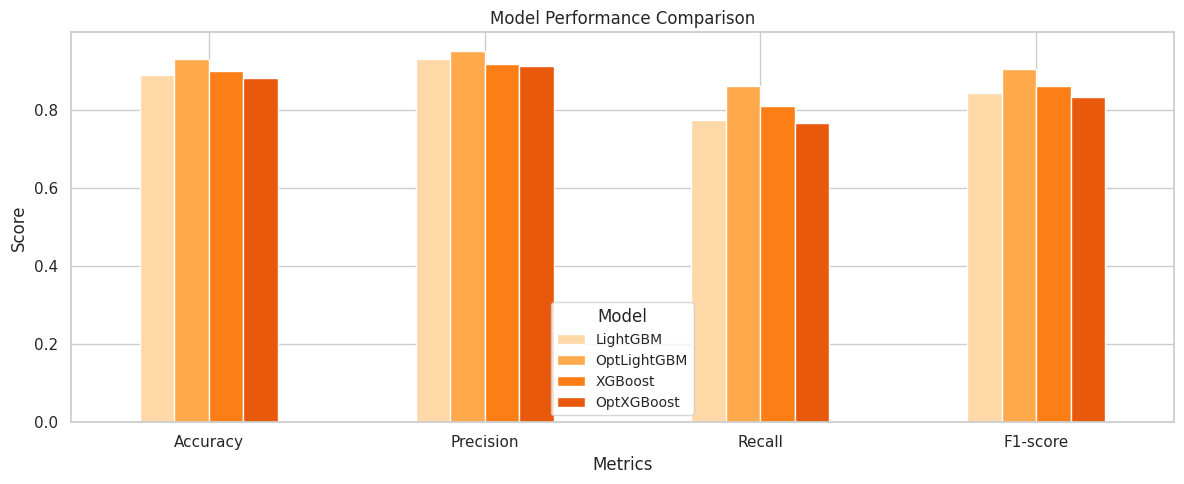

Performance Comparison Table:


,LightGBM,OptLightGBM,XGBoost,OptXGBoost
Accuracy,0.890756,0.929972,0.899160,0.882353
Precision,0.929825,0.951613,0.917355,0.913043
Recall,0.773723,0.861314,0.810219,0.766423
F1-score,0.844622,0.904215,0.860465,0.833333


In [70]:
# Compare and visualize metrics
metrics_df = pd.DataFrame({
    'LightGBM': lgb_metrics,
    'OptLightGBM': optimized_lgb_metrics,
    'XGBoost': xgb_metrics,
    'OptXGBoost': optimized_xgb_metrics
})
# colors
custom_colors = [ '#ffd8a8', '#ffa94d', '#fd7e14', '#e8590c']

metrics_df.plot(kind='bar', figsize=(12, 5), color=custom_colors)
plt.xlabel('Metrics')

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Model',fontsize="small")
plt.tight_layout()
plt.show()

print("Performance Comparison Table:")
metrics_df

Analysis:

**1. LightGBM**

**Strengths:**

Recall: High recall suggests that LightGBM performs well in identifying most of the passengers who survived (positive cases). This is critical in survival analysis tasks where false negatives (failing to predict survival) are costly.

Speed: LightGBM is known for faster training times, which is advantageous for relatively small datasets like the Titanic dataset.

Adaptability: The algorithm handled the categorical and numerical data mix effectively after preprocessing.

**Weaknesses:**

Precision: Relatively lower precision indicates that the model may misclassify some passengers who did not survive as survivors (false positives).

Generalization: LightGBM may slightly overfit if hyperparameter tuning isn't sufficiently careful.

**2. Optimized LightGBM**

**Strengths:**

Balance: Hyperparameter tuning improved precision, leading to fewer false positives while maintaining strong recall.

F1-Score: The balance between precision and recall improved significantly, making the optimized version a better overall performer for this dataset.

**Weaknesses:**

Time Complexity: Although faster than XGBoost, hyperparameter optimization adds computational overhead.

**3. XGBoost**

**Strengths:**

Precision: High precision indicates the model is very effective at avoiding false positives, making it reliable for identifying true non-survivors.

Accuracy: Out-of-the-box accuracy is high, showing robust predictive capability without extensive tuning.

Regularization: Built-in regularization techniques (L1, L2) make it less prone to overfitting, especially beneficial for small datasets like this one.

**Weaknesses:**

Recall: Lower recall means it might miss predicting survival for some passengers (false negatives), which can be problematic in scenarios prioritizing sensitivity.

Training Time: XGBoost is computationally more expensive than LightGBM, especially for iterative improvements.

**4. Optimized XGBoost**

**Strengths:**

Performance Improvement: Tuning hyperparameters enhanced recall and F1-score, addressing weaknesses in the default model.

Generalization: Improved F1-score suggests better adaptability to the unseen test data.

**Weaknesses:**

Resource Usage: Optimization increased training time and computational cost, which might not scale well for larger datasets.